In [1]:
import numpy as np

near_ids = np.load('partial_near_ids_scope_test_v_lookup.npy', allow_pickle=True)


Text(0.5, 1.0, '# of Exact matches by similarity score')

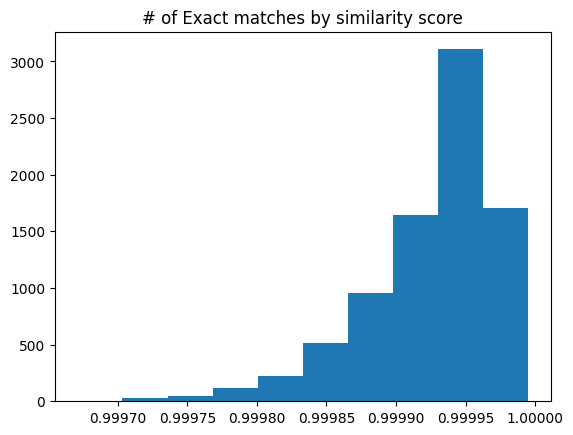

In [2]:
from scope_utils import get_sims_labels
import matplotlib.pyplot as plt

sims, labels = get_sims_labels(near_ids, partial=False)
plt.hist(np.array(sims)[np.array(labels).astype(bool)]) # plot exact matches as a function of their similarity score
plt.title('# of Exact matches by similarity score')

Text(0.5, 1.0, '# of Partial matches by similarity score')

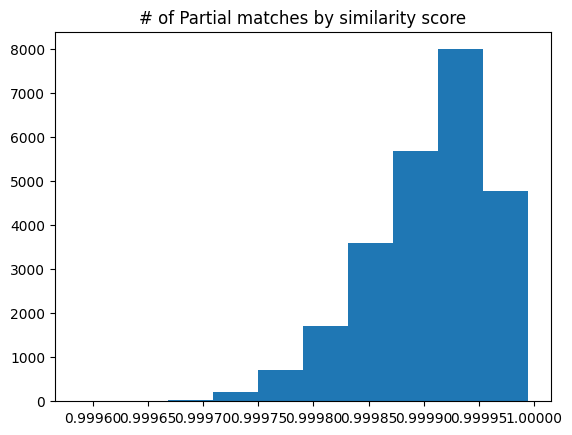

In [3]:
## Now, we plot partial matches as well (i.e.: those that have different families but same superfamily)

sims, labels = get_sims_labels(near_ids, partial=True)
plt.hist(np.array(sims)[np.array(labels).astype(bool)]) # plot exact matches as a function of their similarity score
plt.title('# of Partial matches by similarity score')

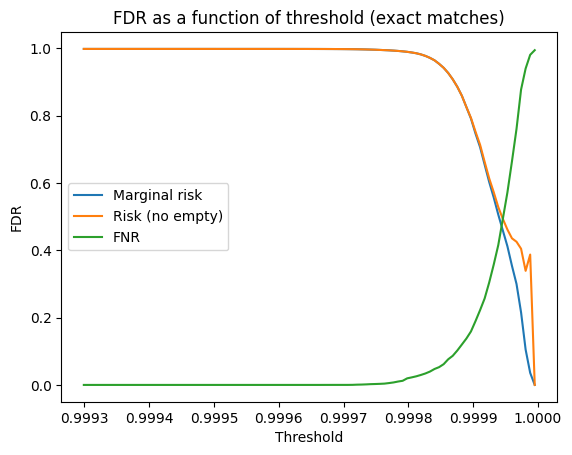

In [4]:
# Now, lets compute the exact FDR curve

from scope_utils import risk_no_empties, calculate_false_negatives, risk

plt.figure()
# Plot FDR as a function of lambda
# sims, labels = get_sims_labels(data, partial=False)
labels = np.stack([query['exact'] for query in near_ids], axis=0)
sims = np.stack([query['S_i'] for query in near_ids], axis=0)
lambdas = np.linspace(sims.min(),sims.max(),100)
risks = [risk(sims, labels, lam) for lam in lambdas]
risks_no_empties = [risk_no_empties(sims, labels, lam) for lam in lambdas]
# percentage_of_discoveries_rsk = [percentage_of_discoveries(sims, labels, lam) for lam in lambdas]
fnr = [calculate_false_negatives(sims, labels, lam) for lam in lambdas]
plt.plot(lambdas, risks, label='Marginal risk')
plt.plot(lambdas, risks_no_empties, label='Risk (no empty)')
# plt.plot(lambdas, percentage_of_discoveries_rsk, label='Percentage of discoveries')
plt.plot(lambdas, fnr, label='FNR')
plt.xlabel('Threshold')
plt.ylabel('FDR')
plt.title('FDR as a function of threshold (exact matches)')
plt.legend()
plt.show()

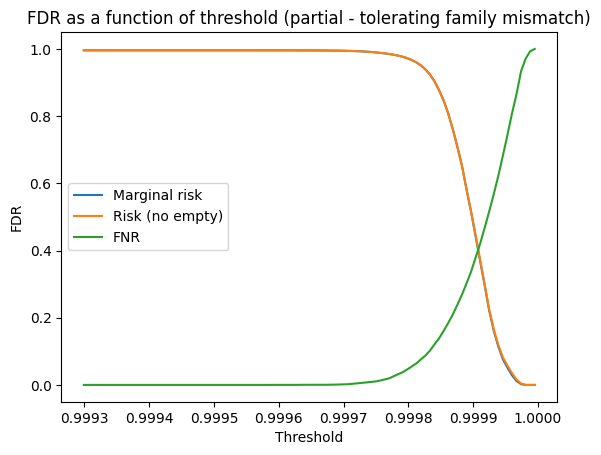

In [5]:
plt.figure()
# Plot FDR as a function of lambda
# sims, labels = get_sims_labels(data, partial=False)
labels = np.stack([query['partial'] for query in near_ids], axis=0)
sims = np.stack([query['S_i'] for query in near_ids], axis=0)
lambdas = np.linspace(sims.min(),sims.max(),100)
risks = [risk(sims, labels, lam) for lam in lambdas]
risks_no_empties = [risk_no_empties(sims, labels, lam) for lam in lambdas]
# percentage_of_discoveries_rsk = [percentage_of_discoveries(sims, labels, lam) for lam in lambdas]
fnr = [calculate_false_negatives(sims, labels, lam) for lam in lambdas]
plt.plot(lambdas, risks, label='Marginal risk')
plt.plot(lambdas, risks_no_empties, label='Risk (no empty)')
# plt.plot(lambdas, percentage_of_discoveries_rsk, label='Percentage of discoveries')
plt.plot(lambdas, fnr, label='FNR')
plt.xlabel('Threshold')
plt.ylabel('FDR')
plt.title('FDR as a function of threshold (partial - tolerating family mismatch)')
plt.legend()
plt.show()

In [6]:
losses = [x['loss'] for x in near_ids]
losses = [item for sublist in losses for item in sublist]
losses = np.array(losses).reshape(400, 14777)

### Plot distribution of similarity scores for different retrieval thresholds
#### Loss explanation
3 - Retrieves a protein with different family, superfamily, and fold (but same class)

2 - Retrieves a protein with different family, superfamily (but same fold, class)

1 - Retrieves a protein with different family, (same superfamily, fold, class)

0 - exact match

(array([2.00000e+01, 8.70000e+01, 4.89000e+02, 5.52100e+03, 4.13550e+04,
        1.89048e+05, 4.97100e+05, 4.78148e+05, 1.00329e+05, 1.44390e+04]),
 array([0.99929929, 0.99936885, 0.99943841, 0.99950796, 0.99957752,
        0.99964714, 0.9997167 , 0.99978626, 0.99985582, 0.99992537,
        0.99999493]),
 <BarContainer object of 10 artists>)

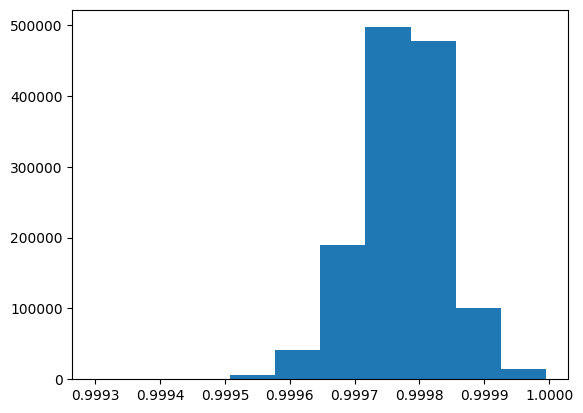

In [7]:
plt.hist(np.array(sims)[np.array(losses <= 3).astype(bool)]) # plot exact matches as a function of their similarity score, color by loss


(array([8.0000e+00, 2.7000e+01, 1.5100e+02, 6.1600e+02, 2.4230e+03,
        9.6650e+03, 2.1429e+04, 2.3223e+04, 1.7967e+04, 8.4220e+03]),
 array([0.99946272, 0.99951595, 0.99956918, 0.9996224 , 0.99967563,
        0.9997288 , 0.99978203, 0.99983525, 0.99988848, 0.99994171,
        0.99999493]),
 <BarContainer object of 10 artists>)

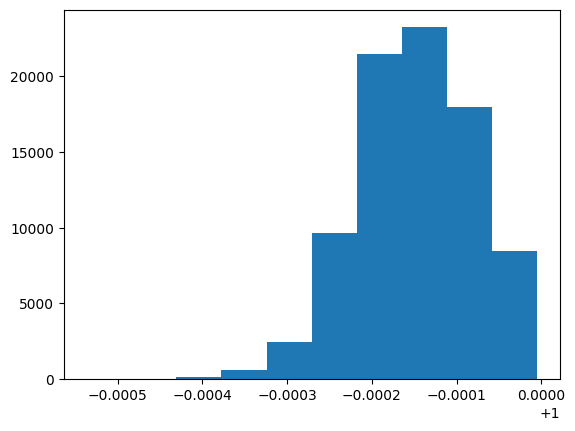

In [8]:
plt.hist(np.array(sims)[np.array(losses <= 2).astype(bool)]) # plot exact matches as a function of their similarity score, color by loss


(array([1.000e+00, 4.000e+00, 4.000e+01, 2.080e+02, 7.140e+02, 1.716e+03,
        3.580e+03, 5.690e+03, 8.010e+03, 4.774e+03]),
 array([0.99958587, 0.99962676, 0.9996677 , 0.99970859, 0.99974948,
        0.99979043, 0.99983132, 0.99987221, 0.9999131 , 0.99995404,
        0.99999493]),
 <BarContainer object of 10 artists>)

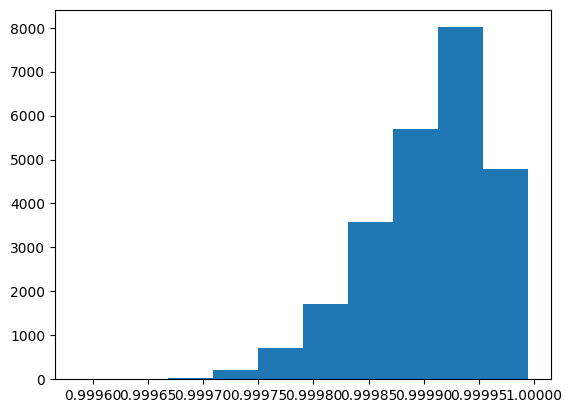

In [9]:
plt.hist(np.array(sims)[np.array(losses <= 1).astype(bool)]) # plot exact matches as a function of their similarity score, color by loss


(array([2.000e+00, 2.800e+01, 5.000e+01, 1.160e+02, 2.260e+02, 5.170e+02,
        9.510e+02, 1.644e+03, 3.112e+03, 1.710e+03]),
 array([0.9996711 , 0.99970347, 0.99973589, 0.99976826, 0.99980062,
        0.99983299, 0.99986541, 0.99989778, 0.99993014, 0.99996257,
        0.99999493]),
 <BarContainer object of 10 artists>)

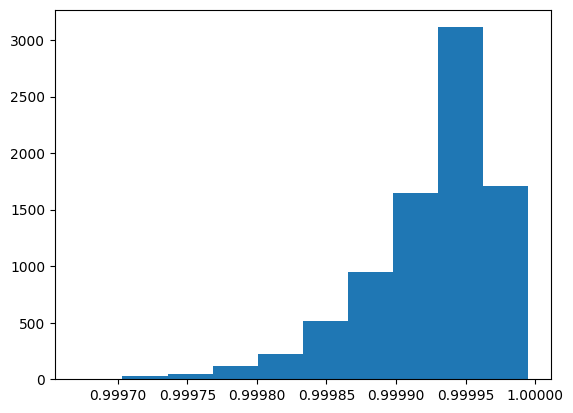

In [10]:
plt.hist(np.array(sims)[np.array(losses == 0).astype(bool)]) # plot exact matches as a function of their similarity score, color by loss


### Run conformal procedure

For now, we use 300 to calibrate, 100 to test on. We use the exact matches as labels (for now).
Still need to do a plot of the loss density by height, but the above plots looking at similarity thresholds give a sense of how the scores consistently shift rightwards as you constrain the lambda/cutoff to be higher and higher.

In [11]:
from scope_utils import get_thresh_FDR

labels = np.stack([query['exact'] for query in near_ids], axis=0)
sims = np.stack([query['S_i'] for query in near_ids], axis=0)


alpha = 0.1
lhat = get_thresh_FDR(labels, sims, alpha, delta=0.5, N=100)

sims.max: 0.9999949336051941
lhat: 0.999987906879849
risk: 0.03583333333333333


/home/seyonec/protein-conformal/scope_utils.py:46: RuntimeWarning: divide by zero encountered in scalar divide
  z = (r_hat - alpha) / (std_hat / np.sqrt(n))


Here, we use 300 to calibrate the lambda threshold, and evaluate on a random sample of 100 test points (against 14777 lookup sequences).

In the future, we could calibrate using the lookup v lookup data (ignoring self-matches), but this may be a tougher task because of the natural distribution shift in the scope test set.

In [12]:
from scope_utils import validate_lhat, get_thresh

num_trials = 3
alpha = 0.1
n_calib = 300 # NOTE: 300 calib, 100 test for now.
for trial in range(num_trials):
    # Randomly split data into calibration and test sets
    np.random.shuffle(near_ids)
    cal_data = near_ids[:n_calib]
    test_data = near_ids[n_calib:]
    lhat = get_thresh(cal_data, alpha)
    error, fraction_inexact, error_partial, fraction_partial = validate_lhat(test_data, lhat)
    print(f'Trial {trial+1}: Ex&!Id/Ex: {error:.2f}, In/Id: {fraction_inexact:.2f}, Pa&!Id/Pa: {error_partial:.2f}, Pa&Id/Id: {fraction_partial:.2f}')


Trial 1: Ex&!Id/Ex: 0.07, In/Id: 0.97, Pa&!Id/Pa: 0.18, Pa&Id/Id: 0.07
Trial 2: Ex&!Id/Ex: 0.13, In/Id: 0.96, Pa&!Id/Pa: 0.25, Pa&Id/Id: 0.11
Trial 3: Ex&!Id/Ex: 0.05, In/Id: 0.97, Pa&!Id/Pa: 0.13, Pa&Id/Id: 0.08


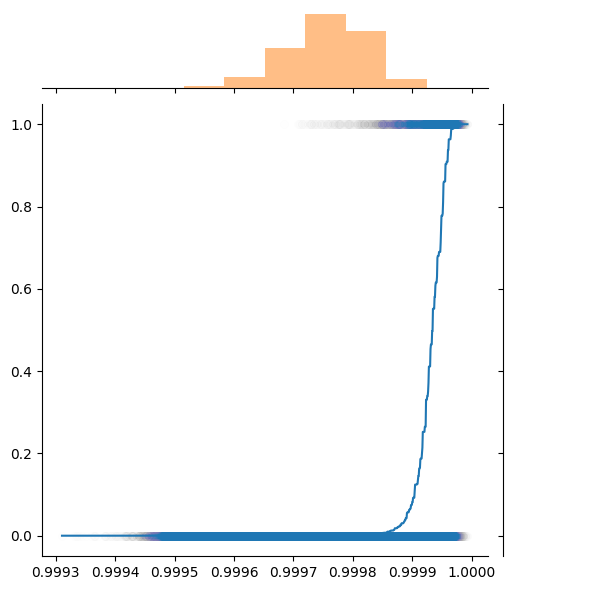

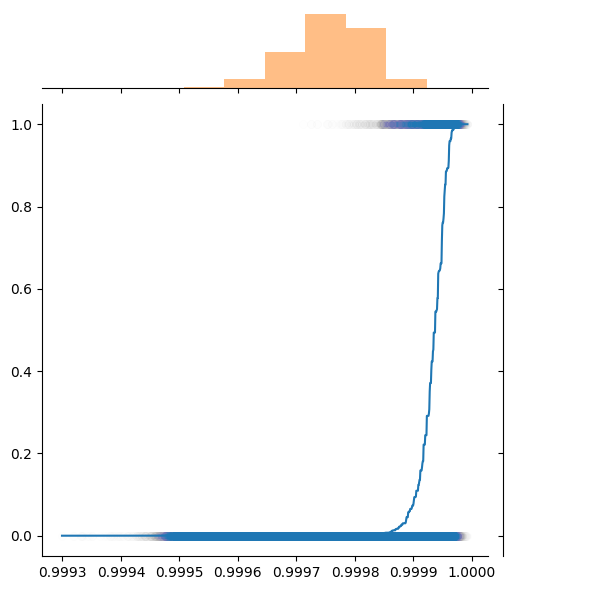

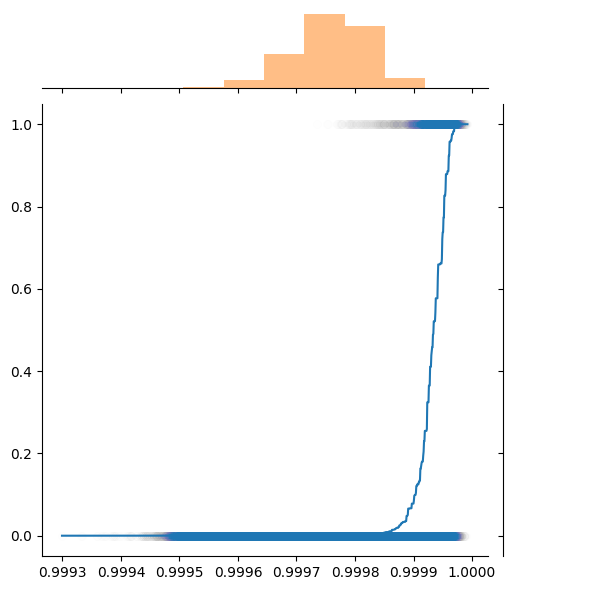

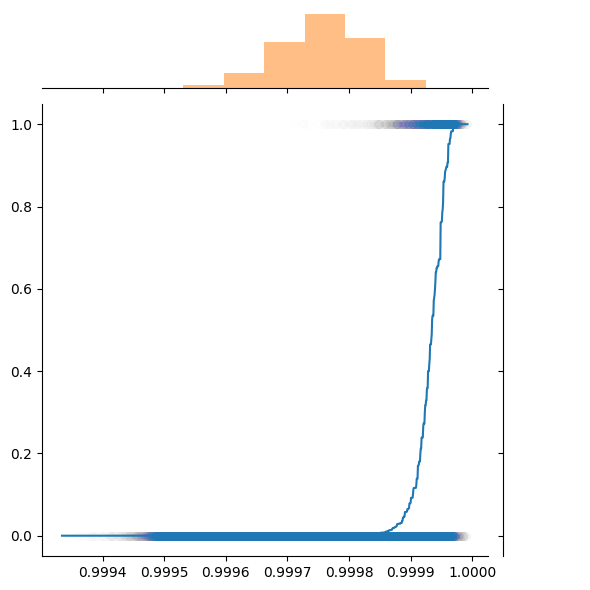

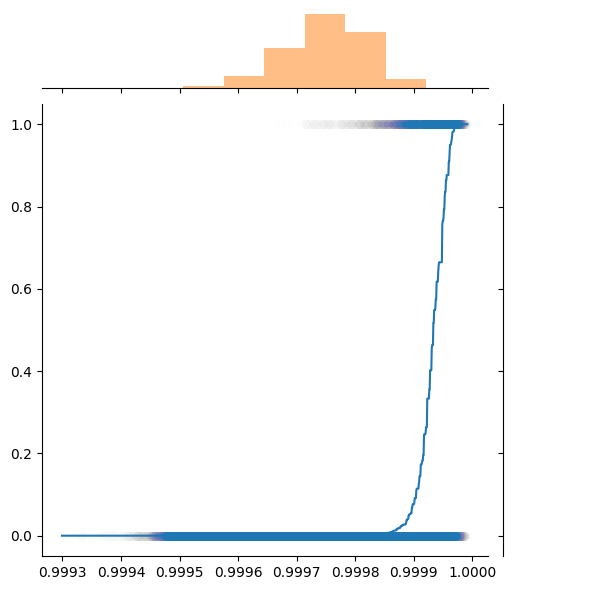

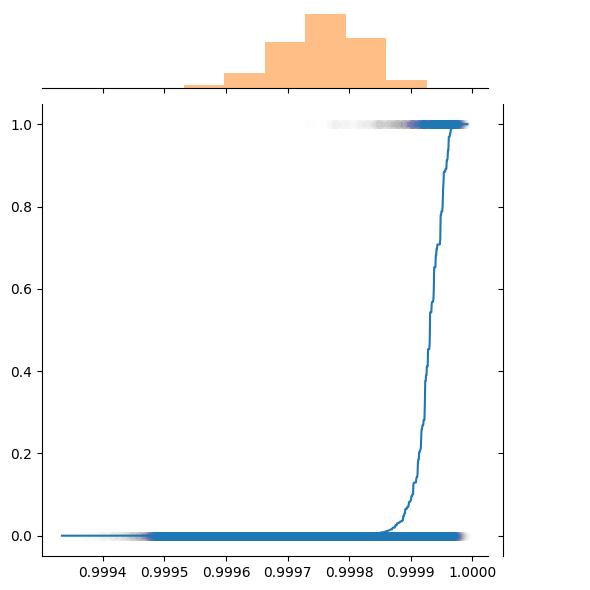

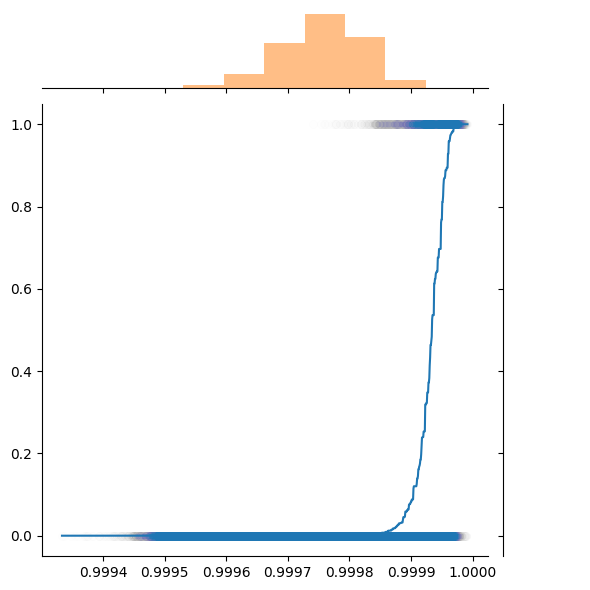

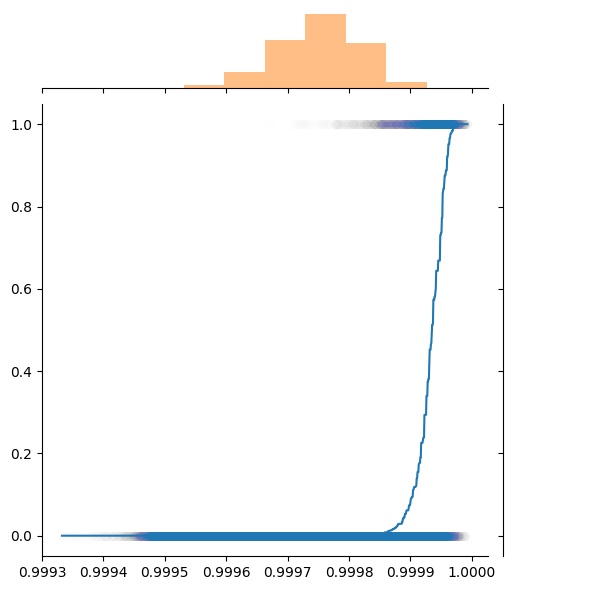

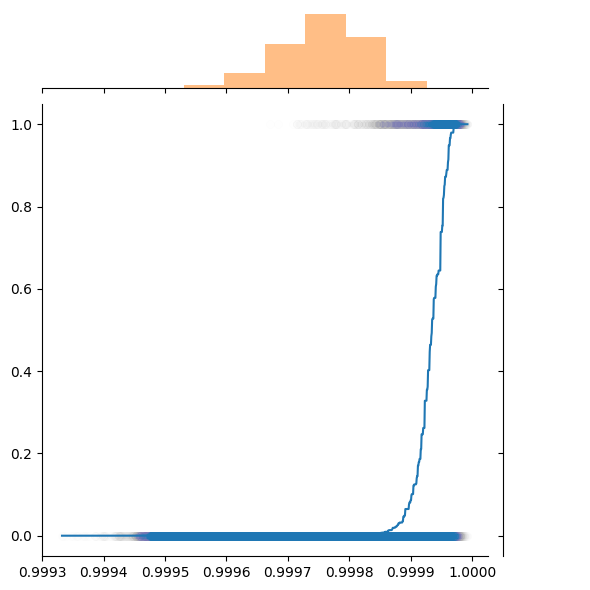

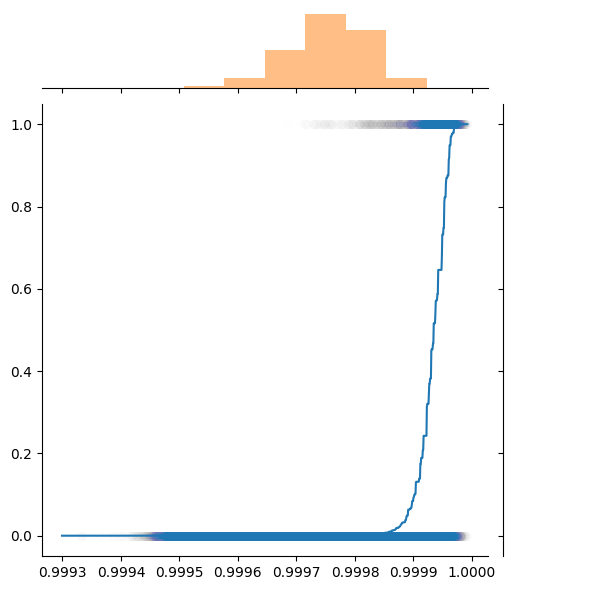

In [13]:
# Full conformal procedure
from scope_utils import get_isotone_regression
import seaborn as sns

num_trials = 10
n_calib = 300 # NOTE: 300 calib, 100 test for now.
for trial in range(num_trials):
    # Randomly split data into calibration and test sets
    np.random.shuffle(near_ids)
    cal_data = near_ids[:n_calib]
    test_data = near_ids[n_calib:]
    ir = get_isotone_regression(cal_data)
    sims, labels = get_sims_labels(test_data, partial=False)
    preds = ir.predict(sims)
    g = sns.JointGrid()
    g.ax_joint.scatter(sims, labels, alpha=0.003)
    x = np.linspace(min(sims), max(sims), 1000)
    phats = ir.predict(x)
    g.ax_joint.plot(x, phats)
    g.ax_marg_x.hist(np.array(sims)[np.array(labels)], label='1', alpha=0.5)
    g.ax_marg_x.hist(np.array(sims)[~np.array(labels)], label='0', alpha=0.5)
    plt.show()
    ##print()
#
